## Activity overview

In this task, you are given with a verbal description of a situation needing optimization procedures development. The solution is supposed to be provided in a form of Jupyter notebook. In the evaluation process, the following skills would be estimated:
- ability to formalize the problem and to write it in a form of mathematical text;
- knowledge in the areas of optimization algorithms development and operations research:
    - standart heuristic and meta-heuristic approaches;
    - exact methods and mathematical programming;
    - complexity theory;
- optimization software usage;
- algorithms development;
- experiments conduction and analysis of results;
- writing a report;
- programming style and code quality.

## Verbal problem formulation
We are given with a set of computational jobs that could be executed on any of two available processors. A job is executed on a single processor without preemptions, and the execution time is known in advance (does not depend on the executing processor). After finishing the job, the next one is run without delays.

There sets of conflicting jobs are listed as well. A processor is able to perform any subset of jobs from the confclicting set, but is unable to perform all the jobs from it. Thus, the jobs from a conflicting set are to be split between the processors in some way to be executed. 

The processor's load is computed as a total execution time of jobs assigned on it. The problem is to find a jobs execution schedule having the smallest difference between the processors' loads.

## Tasks

Do the following tasks. When a task has multiple reasonable solutions, a brief discussion of these alternatives is beneficial.

1. Introduce a notation and formalize the problem.
2. Implement a solver-based solution approach for the problem using the numeric data provided.
3. Implement a specialized heuristic algorithm for the problem using the numeric data provided. Describe the idea of the algorithm and provide its scheme.
4. Perform experiments with the algorithms implemented and describe results of the experiments in a form of analytical report.

### Details

The experimental dataset consists of three instances. An instance is composed from two files: times.txt and conflicts.txt
times.txt contains jobs' execution times listed in a natural order, each value in an individual row.
conflicts.txt contains sets of conflicting jobs, each set is in an individual row, the set's elements are separated by a whitespace, the jobs numeration is assumed to start from zero.

The task could be made just within the present notebook in the cells below.
Good luck!


## Problem formalization

We will denote processors as $machines$ and computational jobs as $jobs$. In this notation we may present our problem as follows.

We have a set of 2 identical parallel machines $M = \{M_1$, $M_2\}$ and a set of n jobs $J = \{{J_1}, {J_2},\dots,{J_n}\}$.
Each job $J_j$ consist of single operation and this may be processed by any of the machines $M_i$ for $p_j$ time units, $\overline{p}= (p_1, \dots,p_n)$.
Any two machines cannot work on the same job simultaneously, and a machine cannot work on more than one job
at a time. We have $k$ subsets $J^l = \{J_{l(1)}, \dots, J_{l(d_l)}\}$ of jobs from $J$.
Any machine $M_i$ is able to perform any subset of jobs from $J^l$, but is unable to perform all the jobs from this subset,
 for every $i = 1, 2$ and every $l = 1,\dots, k$.

The aim is to construct an admissible assignment of all jobs $J_j$ to machines $M_i$ to minimize the deviation of
the total time of jobs assigned on one machine from the total time of jobs assigned on another machine.

## Low bound of the length of the schedule

For $P | pmtn | C_{max} $ problem we know the low bound of the length of the schedule.

$LB = max(max_{j = 1}^{n}p_j;\frac{ \sum_{j = 1}^{n} p_j}{m})$, where $m$ is a number of machines.

Our problem have the same idea to get a low bound. So we know that LB equals to
$LB = max(max_{j = 1}^{n}p_j;\frac{ \sum_{j = 1}^{n} p_j}{2})$ for our problem.

## Model formulation

Constants:

$y_{jl}=
 \begin{cases}
   1 &\text{if job $j$ contains in subset $J^l$,}\\
   0 &\text{else.}
 \end{cases}$


Variables:

$x_{ij}=
 \begin{cases}
   1 &\text{if job $j$ processed on machine $i$,}\\
   0 &\text{else.}
 \end{cases}$

Constraints:

$D\rightarrow min$

$(1)\quad \sum_{j = 1}^{n} x_{0j} \cdot p_j - \sum_{j = 1}^{n} x_{1j} \cdot p_j \leq D$

$(2)\quad \sum_{j = 1}^{n} x_{1j} \cdot p_j - \sum_{j = 1}^{n} x_{0j} \cdot p_j \leq D$

$(3)\quad \sum_{i = 1}^{m} x_{ij} = 1, \quad j = 1, \dots, n$

$(4)\quad \sum_{i = 1}^{m} \sum_{j = 1}^{n} x_{ij} = n$

$(5)\quad \sum_{j = 1}^{n} x_{ij} \cdot y_{jl} < \sum_{j = 1}^{n} y_{jl}, \quad i = 1, \dots, m; l = 1, \dots, k$

Equations $(1)$ and $(2)$ set the maximum deviation of the schedule length for the machines. Constraint $(3)$ ensure that every job $j$ is processed
on only single machine. Equation $(4)$ guarantee that all jobs will be assigned. Condition $(5)$ allow us not
to assign all jobs from subset $J^l$ on the same machine $M_i$ for every subset $J^l,  \quad l = 1, \dots, k$.

## Computation results for the solver

## First data instances

In [10]:
from solverApproach import show_solver_solution

show_solver_solution(instance_number=1)

Number of variables = 21
Number of constraints = 44
Solution:
Objective value = 0.0
Solution: 0.0

Advanced information:
Problem solved in 18.000000 milliseconds
Problem solved in 0 iterations
Problem have a bound 0.0
________________
Machine(0, working time: 2640, assigned jobs: [Job(0, 771), Job(2, 281), Job(3, 854), Job(5, 734)])
Machine(1, working time: 2640, assigned jobs: [Job(1, 121), Job(4, 885), Job(6, 486), Job(7, 1003), Job(8, 83), Job(9, 62)])


0

## Second data instances

In [11]:
show_solver_solution(instance_number=2)

Number of variables = 201
Number of constraints = 5204
Solution:
Objective value = 207.0
Solution: 207.0

Advanced information:
Problem solved in 3731.000000 milliseconds
Problem solved in 0 iterations
Problem have a bound 207.0
________________
Machine(0, working time: 320, assigned jobs: [Job(50, 1), Job(51, 10), Job(52, 1), Job(53, 10), Job(54, 1), Job(55, 10), Job(56, 1), Job(57, 1), Job(58, 1), Job(59, 10), Job(60, 10), Job(61, 10), Job(62, 10), Job(63, 10), Job(64, 10), Job(65, 1), Job(66, 1), Job(67, 10), Job(68, 10), Job(69, 10), Job(70, 1), Job(71, 10), Job(72, 10), Job(73, 1), Job(74, 10), Job(75, 10), Job(76, 1), Job(77, 1), Job(78, 1), Job(79, 10), Job(80, 10), Job(81, 1), Job(82, 10), Job(83, 10), Job(84, 1), Job(85, 10), Job(86, 10), Job(87, 1), Job(88, 10), Job(89, 10), Job(90, 1), Job(91, 10), Job(92, 10), Job(93, 10), Job(94, 1), Job(95, 1), Job(96, 1), Job(97, 10), Job(98, 10), Job(99, 10)])
Machine(1, working time: 113, assigned jobs: [Job(0, 1), Job(1, 1), Job(2, 1)

0

In [12]:
# show_solver_solution(instance_number=3)

Solver approach may found solutions for all data instances. Solver deals with that problems in a seconds for the
first and for a second data sets. To deal with the third data instances we need more time.


## Computation results for the heuristic approach for different instances

## Local search algorithm

We represent the solution as a jobs permutation and apply two different decoding procedures
to find the schedule. If conflicts conditions we include into the objective function with the penalty.
Our goal is to find the best admissible permutation which will correspond to the best
schedule.

The objective function is equals to the deviation of
the total time of jobs assigned on one machine from the total time of jobs assigned on another machine plus the penalty.
If the solution is infeasible penalty equals to the total time of all the jobs. Otherwise, penalty equals to zero.

To find the best jobs permutation we apply multistart local search algorithm.
It starts with some number of random permutations (we have 10 start permutations) and apply local search algorithm for every
initial permutation. It is necessarily for as to have the feasible solution in the
set of initial permutations. The result is the best found permutation.

## Decoding procedure based on idea of constructions schedule with length near the low bound

This algorithm counts the total time of all the jobs and calculated the low bound for the solution as it was presented
in the beginning. It trys to construct the solution with this length of the schedule.

While the length of the schedule on the first machine low than the low bound the algorithm assign jobs on this machine
one by one from following the given permutation. Other jobs which was not assigned on the first machine
should be processed on the second machine.

That procedure find the solutions with schedule lengths near the low bound. But more of them is infeasible. So we need to
do more iterations of local search algorithm to find feasible solution.

The plot below shows the behaviour of the objective function with and without penalty for this decoding procedure and
for the different data instances.

## First data instances

Found solution with objective function equals to 134
Algorithm works for  0.056015729904174805  seconds
________________
Machine(0, working time: 2707, assigned jobs: [Job(6, 486), Job(3, 854), Job(8, 83), Job(2, 281), Job(7, 1003)])
Machine(1, working time: 2573, assigned jobs: [Job(9, 62), Job(5, 734), Job(1, 121), Job(4, 885), Job(0, 771)])


D:\pythonProject\task for candidates\plotVisualization.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0

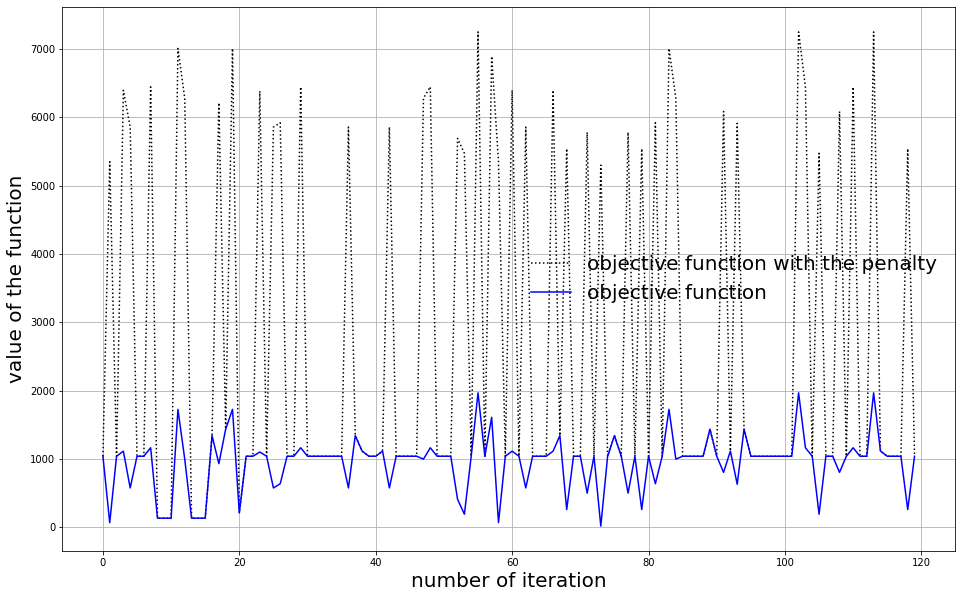

In [13]:
from localSearch import show_local_search_solution

show_local_search_solution(instance_number=1, decoding_function=1)

In [14]:
# show_local_search_solution(instance_number=2, decoding_function=1)

In [15]:
# show_local_search_solution(instance_number=3, decoding_function=1)

## Decoding procedure based on the idea of avoiding conflicts

This algorithm build the solution with feasible schedule for the first machine. It assign jobs in permutation one by one
for a first machine. When some job is assigning on the first machine, the algorithm checks if in any conflicted set all
jobs assigned on the first machine excepted one. The algorithm assign this one job on the second machine.
Thus, the schedule for a first machine does not have any conflicts.

This algorithm shows more stable behavior of the objective function.

## First data instances

Found solution with objective function equals to 562
Algorithm works for  0.19165515899658203  seconds
________________
Machine(0, working time: 2921, assigned jobs: [Job(1, 121), Job(9, 62), Job(6, 486), Job(8, 83), Job(7, 1003), Job(4, 885), Job(2, 281)])
Machine(1, working time: 2359, assigned jobs: [Job(3, 854), Job(5, 734), Job(0, 771)])


0

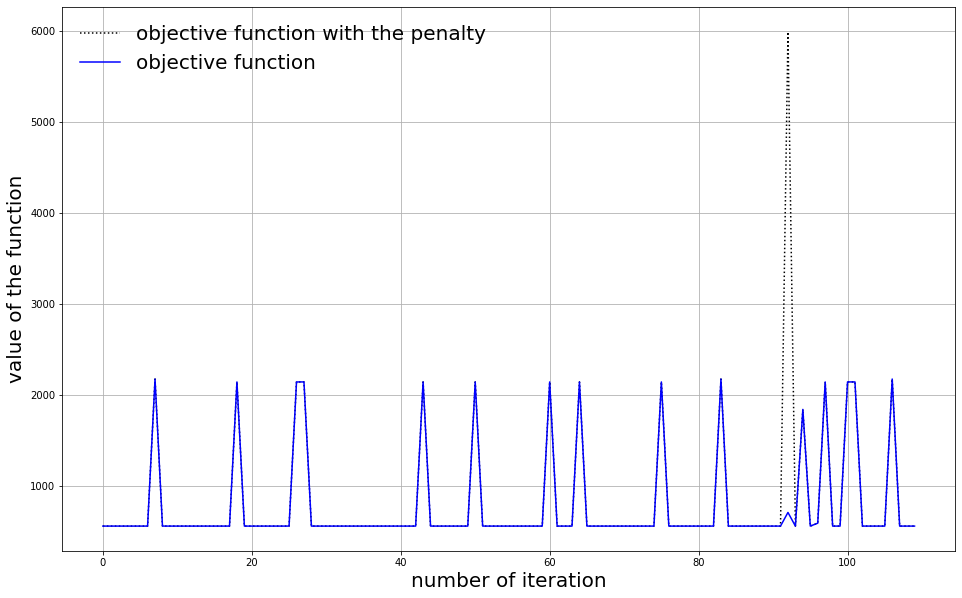

In [16]:
show_local_search_solution(instance_number=1, decoding_function=2)

## Second data instances

Found solution with objective function equals to 207
Algorithm works for  13.055609226226807  seconds
________________
Machine(0, working time: 113, assigned jobs: [Job(25, 1), Job(10, 1), Job(44, 1), Job(32, 1), Job(8, 1), Job(41, 1), Job(22, 1), Job(45, 1), Job(1, 1), Job(43, 10), Job(17, 1), Job(34, 10), Job(38, 10), Job(4, 1), Job(39, 1), Job(29, 1), Job(18, 1), Job(23, 1), Job(9, 1), Job(26, 1), Job(20, 1), Job(3, 10), Job(28, 1), Job(12, 10), Job(19, 1), Job(16, 1), Job(14, 1), Job(27, 1), Job(24, 1), Job(0, 1), Job(31, 1), Job(42, 1), Job(15, 1), Job(6, 1), Job(35, 10), Job(49, 1), Job(21, 10), Job(36, 1), Job(48, 1), Job(30, 1), Job(40, 1), Job(2, 1), Job(7, 1), Job(47, 1), Job(5, 1), Job(13, 1), Job(33, 1), Job(46, 1), Job(37, 1), Job(11, 1)])
Machine(1, working time: 320, assigned jobs: [Job(50, 1), Job(51, 10), Job(52, 1), Job(53, 10), Job(54, 1), Job(55, 10), Job(56, 1), Job(57, 1), Job(58, 1), Job(59, 10), Job(60, 10), Job(61, 10), Job(62, 10), Job(63, 10), Job(64, 10), Jo

0

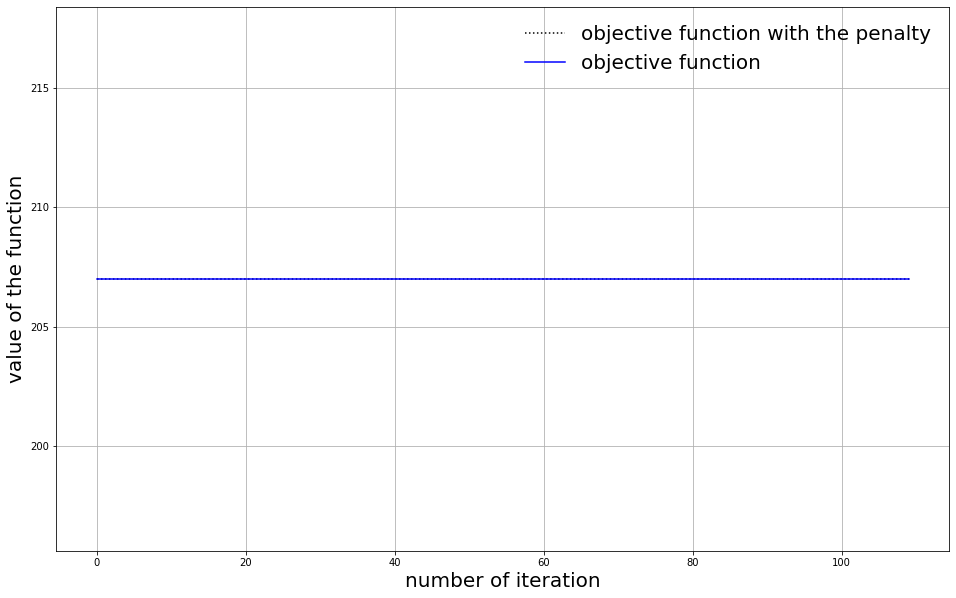

In [17]:
show_local_search_solution(instance_number=2, decoding_function=2)

In [18]:
# show_local_search_solution(instance_number=3, decoding_function=2)

## Conclusion

For the first data instances the local search algorithm with the first decoding procedure may found the optimal or near
optimal solution. The result is depends on the random staring permutations and randomly selected neighbours in the local search heuristic.
But the algorithm with the second decoding procedure is unable to get the optimal solution because of the scheduling method.

Second data set contains only one feasible solution. Local search algorithm with the first decoding procedure need
a lot of iterations to get this solution for random initial permutation. But the algorithm with the second decoding
procedure is able to get only this feasible solution.

To find the feasible solution for the first and a second data sets we need to do more iterations but it gets unacceptable
amount of time.

Thus, these algorithms works effective for different types of test instances. But both of them can not effective handle
with the big size data instances.